In [1]:
#imports and dependents

import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
titanicDF = pd.read_csv('titanic.csv')
titanicDF

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,NaN,NaN,yes
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,NaN,NaN,yes
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no


In [4]:
titanicDF.isnull().sum()

name          0
gender        0
age           2
class         0
embarked      0
country      81
ticketno    891
fare        916
sibsp       900
parch       900
survived      0
dtype: int64

In [5]:
titanicDF.drop_duplicates()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,NaN,NaN,yes
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,NaN,NaN,yes
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,NaN,NaN,no
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,NaN,NaN,no


In [6]:
cleanedDF = titanicDF.dropna(subset=['fare','sibsp', 'parch'])

In [7]:
cleanedDF['age'].fillna(cleanedDF['age'].median(), inplace=True)

In [8]:
print(cleanedDF.dtypes)

name         object
gender       object
age         float64
class        object
embarked     object
country      object
ticketno    float64
fare        float64
sibsp       float64
parch       float64
survived     object
dtype: object


In [9]:
cleanedDF['fare'] = pd.to_numeric(cleanedDF['fare'], errors='coerce')
cleanedDF['sibsp'] = pd.to_numeric(cleanedDF['sibsp'], errors='coerce')
cleanedDF['parch'] = pd.to_numeric(cleanedDF['parch'], errors='coerce')

In [10]:
cleanedDF['gender'] = cleanedDF['gender'].map({'male': 0, 'female': 1})

In [11]:
cleanedDF['survived'] = cleanedDF['survived'].map({'yes': 1, 'no': 0})

In [12]:
cleanedDF = pd.get_dummies(cleanedDF, columns=['class', 'embarked'])

In [13]:
cleanedDF = cleanedDF.drop(columns=['name', 'ticketno'])

In [14]:
cleanedDF

,gender,age,country,fare,sibsp,parch,survived,class_1st,class_2nd,class_3rd,embarked_C,embarked_Q,embarked_S
0,0,42.0,United States,7.1100,0.0,0.0,0,False,False,True,False,False,True
1,0,13.0,United States,20.0500,0.0,2.0,0,False,False,True,False,False,True
2,0,16.0,United States,20.0500,1.0,1.0,0,False,False,True,False,False,True
3,1,39.0,England,20.0500,1.0,1.0,1,False,False,True,False,False,True
4,1,16.0,Norway,7.1300,0.0,0.0,1,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,24.0,France,13.0000,0.0,0.0,0,False,True,False,False,False,True
1315,0,22.0,Turkey,7.0406,0.0,0.0,0,False,False,True,True,False,False
1316,0,27.0,Turkey,7.0406,0.0,0.0,0,False,False,True,True,False,False
1317,0,25.0,Lebanon,7.0406,0.0,0.0,1,False,False,True,True,False,False


In [15]:
#features for survival segmentation
titanicFeatures = cleanedDF[['age', 'fare', 'survived']]

In [16]:
#standardize the features
stanScaler = StandardScaler()
featuresScaled = stanScaler.fit_transform(titanicFeatures)

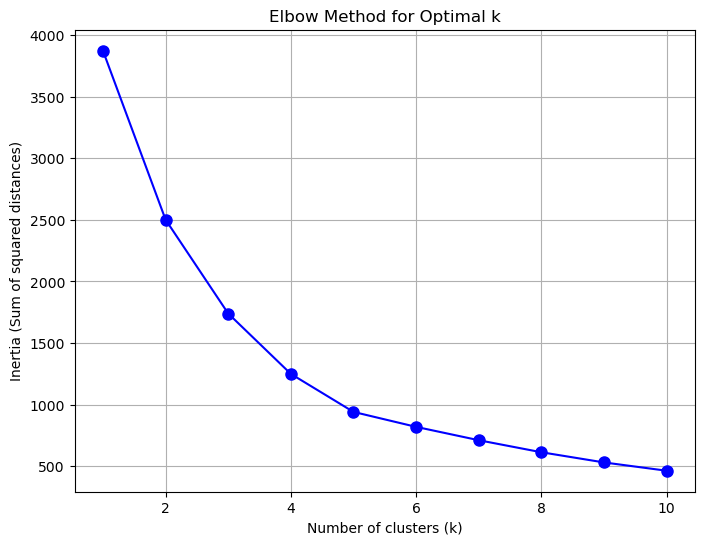

In [17]:
#elbow method for cluster groups
# Step 2: Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Checking for cluster numbers from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(featuresScaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the results of the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

In [18]:
#peform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choosing 3 clusters as an example
cleanedDF['cluster'] = kmeans.fit_predict(featuresScaled)

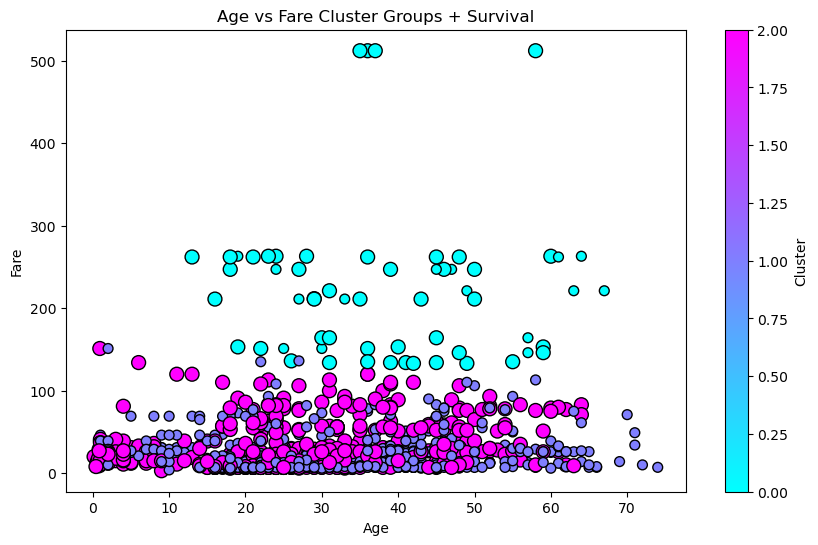

In [21]:
#visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(cleanedDF['age'], cleanedDF['fare'], c=cleanedDF['cluster'], cmap='cool', edgecolor='k', s=(cleanedDF['survived']+1)*50)  # Size by survival
plt.title('Age vs Fare Cluster Groups + Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(scatter, label='Cluster')
# Step 4: Save the figure as a .png file
plt.savefig('cluster_visualization.png', format='png', dpi=300)
plt.show()
